In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [17]:
df = pd.read_csv("churn_Modelling.csv")
print(df.head())
print(df.info())
print(df['Exited'].value_counts())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [18]:

df.drop(columns=['customer_id'], inplace=True, errors='ignore')
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'Exited' in cat_cols:
    cat_cols.remove('Exited')

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
if df['Exited'].dtype == 'object':
    df['Exited'] = df['Exited'].map({'No': 0, 'Yes': 1})
X = df.drop('Exited', axis=1)
y = df['Exited']



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8655
Confusion Matrix:
 [[1552   55]
 [ 214  179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



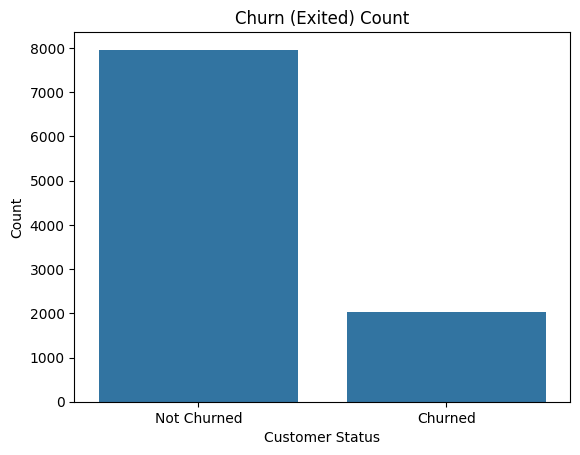

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=df)
plt.title("Churn (Exited) Count")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.show()


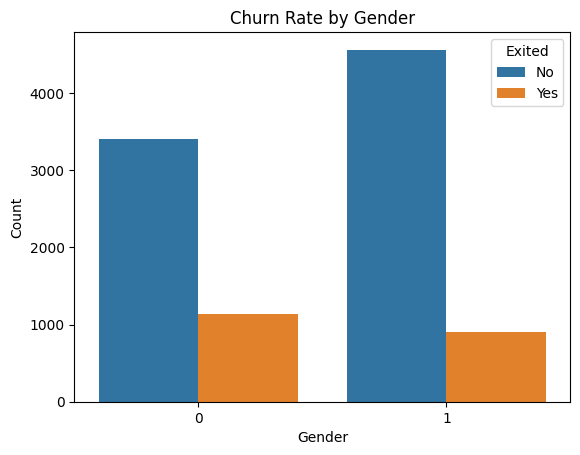

In [23]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


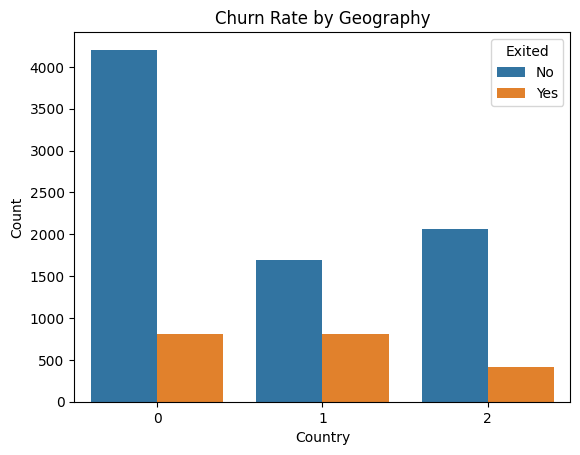

In [24]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn Rate by Geography")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


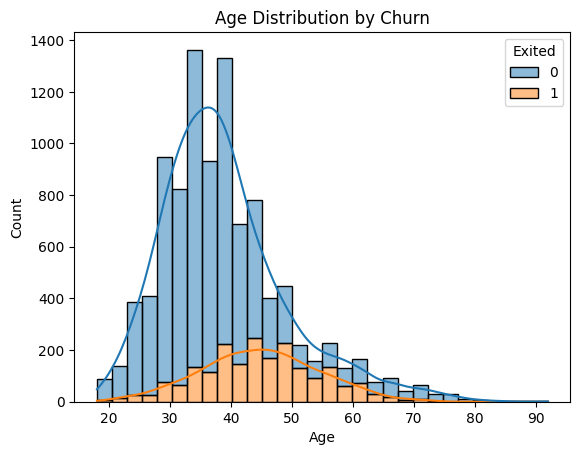

In [25]:
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True, multiple='stack')
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
